# SIT720 Task 3.2C 

# Machine Learning

In [28]:
import pandas as pd

# Load the data 
data = pd.read_csv("FluoridationData.csv")

# Print the data
print("Dimensions of the data:", data.shape)
print(data)


Dimensions of the data: (1059, 9)
      cartodb_id  melbourne  postcode    id   fluoride_level  \
0            236      False      3227   236      Fluoridated   
1              1       True      3067     1      Fluoridated   
2              2       True      3040     2      Fluoridated   
3              3      False      3352     3  Not fluoridated   
4              4      False      3465     4      Fluoridated   
...          ...        ...       ...   ...              ...   
1054        1055      False      3352  1055      Fluoridated   
1055        1056       True      3770  1056      Fluoridated   
1056        1057      False      3869  1057      Fluoridated   
1057        1058       True      3063  1058      Fluoridated   
1058        1059      False      3418  1059  Not fluoridated   

                water_company     townsuburb        lat         lon  
0                Barwon Water     CONNEWARRE -38.264069  144.462309  
1             City West Water     ABBOTSFORD -37.803000  

In [29]:
# Display data types 
print("Data types of all features:")
print(data.dtypes)

# Print median values 
float_features = data.select_dtypes(include=['float'])
if not float_features.empty:
    print("\nMedian values of float-type features:")
    print(float_features.median())
else:
    print("\nNo float-type features found in the dataset.")


Data types of all features:
cartodb_id          int64
melbourne            bool
postcode            int64
id                  int64
fluoride_level     object
water_company      object
townsuburb         object
lat               float64
lon               float64
dtype: object

Median values of float-type features:
lat    -37.788
lon    144.989
dtype: float64


In [30]:
# Print all the unique values 
unique_fluoride_levels = data['fluoride_level'].unique()
print("Unique values of 'fluoride_level':")
print(unique_fluoride_levels)

# Calculate the ratio 
print("\nRatio of each 'fluoride_level' value:")
for level in unique_fluoride_levels:
    ratio = (data['fluoride_level'] == level).mean()
    print(f"{level}: {ratio:.2%}")


Unique values of 'fluoride_level':
['Fluoridated' 'Not fluoridated' 'Partly fluoridated' 'Natural fluoride']

Ratio of each 'fluoride_level' value:
Fluoridated: 74.32%
Not fluoridated: 24.17%
Partly fluoridated: 1.32%
Natural fluoride: 0.19%


In [31]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['melbourne'], data['fluoride_level'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# results
alpha = 0.05
print("Chi-square statistic:", chi2)
print("p-value:", p)
if p <= alpha:
    print("There is a significant association between 'melbourne' and 'fluoride_level'.")
else:
    print("There is no significant association between 'melbourne' and 'fluoride_level'.")

Chi-square statistic: 164.56534953232273
p-value: 1.8958896190626055e-35
There is a significant association between 'melbourne' and 'fluoride_level'.


The chi-square test statistic is a measure of the discrepancy between the observed frequencies in the contingency table and the frequencies that would be expected if the variables 'melbourne' and 'fluoride_level' were independent of each other. In this case, the chi-square statistic is approximately 164.57.

The p-value associated with the chi-square statistic is extremely small, approximately 1.896e-35. This p-value represents the probability of observing a chi-square statistic as extreme or more extreme than the one calculated, assuming that the null hypothesis is true. Here, the null hypothesis is that there is no association between 'melbourne' and 'fluoride_level'.

Since the p-value is much smaller than the commonly used significance level of 0.05, we reject the null hypothesis. Therefore, we conclude that there is a significant association between 'melbourne' and 'fluoride_level'.

In [32]:
# Count the number of water companies 
water_company = data['townsuburb'].value_counts()

# Print the result
print("Number of water companies for different suburbs:")
print(water_company)


Number of water companies for different suburbs:
townsuburb
BAYSWATER      2
OAKLEIGH       2
UPWEY          2
TULLAMARINE    2
ARMADALE       2
              ..
FRYERSTOWN     1
FYANSFORD      1
GARDENVALE     1
GARFIELD       1
NHILL          1
Name: count, Length: 1046, dtype: int64


In [33]:
water_company = data["townsuburb"].value_counts()

biggest_suburb = water_company.idxmax()

# Print the result
print("Suburb with the biggest number of water companies:", biggest_suburb)


Suburb with the biggest number of water companies: BAYSWATER


In [34]:
# Filter the data 
fluoridated_data = data[data['fluoride_level'].notnull()]

# Count the number of water companies 
fluoridated_water_company_counts = fluoridated_data.groupby('townsuburb')['water_company'].nunique()

# Find the suburb 
max_fluoridated_suburb = fluoridated_water_company_counts.idxmax()

# Print the result
print("Suburb with the biggest number of fluoridated companies:", max_fluoridated_suburb)

Suburb with the biggest number of fluoridated companies: ARMADALE


In [35]:
# Create a pivot table 
pivot_table = data.pivot_table(index='townsuburb', columns='fluoride_level', aggfunc='size', fill_value=0)

# Print the pivot table
print("Number of water companies at different fluoride levels for different suburbs:")
print(pivot_table)


Number of water companies at different fluoride levels for different suburbs:
fluoride_level  Fluoridated  Natural fluoride  Not fluoridated  \
townsuburb                                                       
ABBOTSFORD                1                 0                0   
ABERFELDIE                1                 0                0   
ADDINGTON                 0                 0                1   
ADELAIDE LEAD             1                 0                0   
AGNES                     0                 0                1   
...                     ...               ...              ...   
YELLINGBO                 0                 0                0   
YENDON                    1                 0                0   
YERING                    1                 0                0   
YINNAR                    1                 0                0   
YUROKE                    1                 0                0   

fluoride_level  Partly fluoridated  
townsuburb                

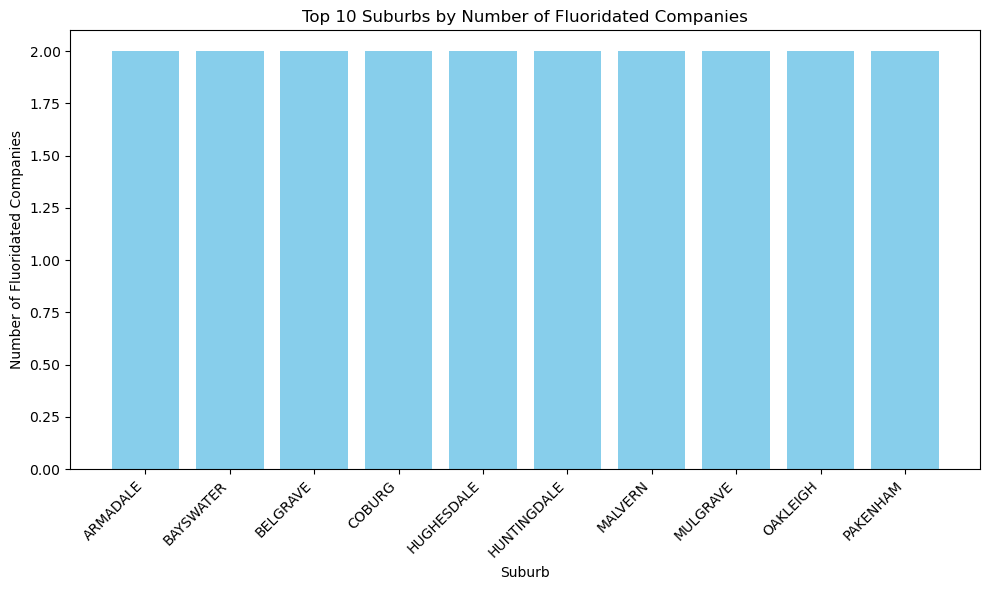

In [36]:
import matplotlib.pyplot as plt

top_10_suburbs = fluoridated_water_company_counts.nlargest(10)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(top_10_suburbs.index, top_10_suburbs.values, color='skyblue')
plt.xlabel('Suburb')
plt.ylabel('Number of Fluoridated Companies')
plt.title('Top 10 Suburbs by Number of Fluoridated Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#The histogram visualizes the number of fluoridated companies in the top 10 suburbs with the highest counts of such companies. Each bar represents a suburb, and its height corresponds to the number of fluoridated companies in that suburb.
Suburbs with the highest number of fluoridated companies: The bars show the distribution of fluoridated companies across the top 10 suburbs. From the histogram, we can identify which suburbs have the highest concentration of fluoridated companies.

C:\Users\asgau\AppData\Local\Temp\ipykernel_27816\248034732.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)
C:\Users\asgau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asgau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asgau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` 

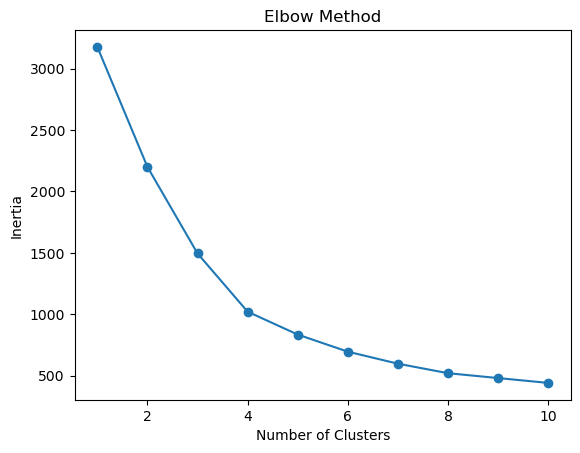

C:\Users\asgau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters: 3


In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = data[['postcode', 'cartodb_id', 'lat']]

features.dropna(inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


num_clusters = len(set(clusters))

# Print the number of clusters
print("Number of clusters:", num_clusters)


In [38]:
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from sklearn.cluster import KMeans
import numpy as np

# Initialize variables 
best_silhouette_score = -1
best_k = -1

# Range of K values 
k_values = range(2, 11)

# Iterate over each K value
for k in k_values:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_k = k
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
clusters_best = kmeans_best.fit_predict(scaled_features)

# Compute the purity score
def purity_score(y_true, y_pred):
    """
     Calculate the purity score.
   """
    #Compute contingency matrix
    contingency_matrix = np.zeros((len(np.unique(y_true)), len(np.unique(y_pred))))
    for i in range(len(y_true)):
        contingency_matrix[y_true[i], y_pred[i]] += 1

    # Compute purity
    purity = np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

    return purity

# Print the best K value
print("Best K value:", best_k)

C:\Users\asgau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asgau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asgau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asgau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Best K value: 7


In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Initialize
best_silhouette_score_pp = -1
best_k_pp = -1

# Range of K values 
k_values = range(2, 11)

# Iterate over each K value
for k in k_values:
    # Perform K-means++ clustering
    kmeans_pp = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels_pp = kmeans_pp.fit_predict(scaled_features)
    
    # Calculate silhouette score
    silhouette_avg_pp = silhouette_score(scaled_features, cluster_labels_pp)
    
    # Update best silhouette score 
    if silhouette_avg_pp > best_silhouette_score_pp:
        best_silhouette_score_pp = silhouette_avg_pp
        best_k_pp = k

# Perform K-means++ clustering
kmeans_pp_best = KMeans(n_clusters=best_k_pp, init='k-means++', random_state=42)
clusters_pp_best = kmeans_pp_best.fit_predict(scaled_features)

# Print the best K value
print("Best K value (K-Means++):", best_k_pp)

C:\Users\asgau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asgau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asgau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asgau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Best K value (K-Means++): 7


In [40]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5)
cluster_labels_dbscan = dbscan_cluster.fit_predict(scaled_features)

# Count the number of clusters 
num_clusters_dbscan = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)

# Print the number of clusters
print("Number of clusters (DBSCAN):", num_clusters_dbscan)

Number of clusters (DBSCAN): 4
